In [10]:
import os
import time
import pickle
from datetime import datetime

import numpy as np
import pandas as pd
import lightgbm as lgb
import scipy.stats as stats
from scipy.stats import pearsonr
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

import talib

import xgboost as xgb

import mplfinance as mpf
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

In [11]:
data_dir = "../data"

crypto_df = pd.read_csv(os.path.join(data_dir, "train.csv"))
asset_details = pd.read_csv(os.path.join(data_dir, "asset_details.csv"))

In [30]:
eth = crypto_df.loc[crypto_df["Asset_ID"]==6, :].copy()
eth["timestamp"] = eth["timestamp"].astype("datetime64[s]")
eth = eth.set_index("timestamp")

In [31]:
eth.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
2018-01-01 00:01:00,6,173.0,738.3025,746.00,732.51,738.5075,335.987856,738.839291,-0.004809
2018-01-01 00:02:00,6,192.0,738.5075,745.14,732.49,738.2600,232.793141,738.268967,-0.004441
2018-01-01 00:03:00,6,120.0,738.3325,745.12,730.00,737.5025,174.138031,737.994457,-0.004206
2018-01-01 00:04:00,6,156.0,737.2225,744.69,728.93,737.1025,165.383926,737.303631,-0.002205
2018-01-01 00:05:00,6,118.0,736.5300,743.80,727.11,735.7050,193.078039,736.163026,-0.001744


In [118]:
eth = crypto_df.loc[crypto_df["Asset_ID"]==6, :].copy()
eth["timestamp"] = eth["timestamp"].astype("datetime64[s]")
eth = eth.set_index("timestamp")

In [119]:
eth.head()

,Asset_ID,Count,Open,High,Low,Close,Volume,VWAP,Target
timestamp,,,,,,,,,
2021-03-01 00:01:00,6,1994.0,1427.295714,1431.9,1424.52,1429.100000,1281.078030,1428.349097,0.001960
2021-03-01 00:02:00,6,2687.0,1429.180000,1431.9,1419.40,1421.937143,2425.177972,1425.601275,0.001964
2021-03-01 00:03:00,6,2733.0,1421.834286,1425.9,1415.03,1418.541429,2218.959609,1421.408891,0.001627
2021-03-01 00:04:00,6,1623.0,1417.418571,1421.9,1413.67,1416.615714,1011.074729,1417.567509,0.001125
2021-03-01 00:05:00,6,2658.0,1416.435714,1419.1,1410.72,1413.089610,1694.403041,1414.547367,0.000843


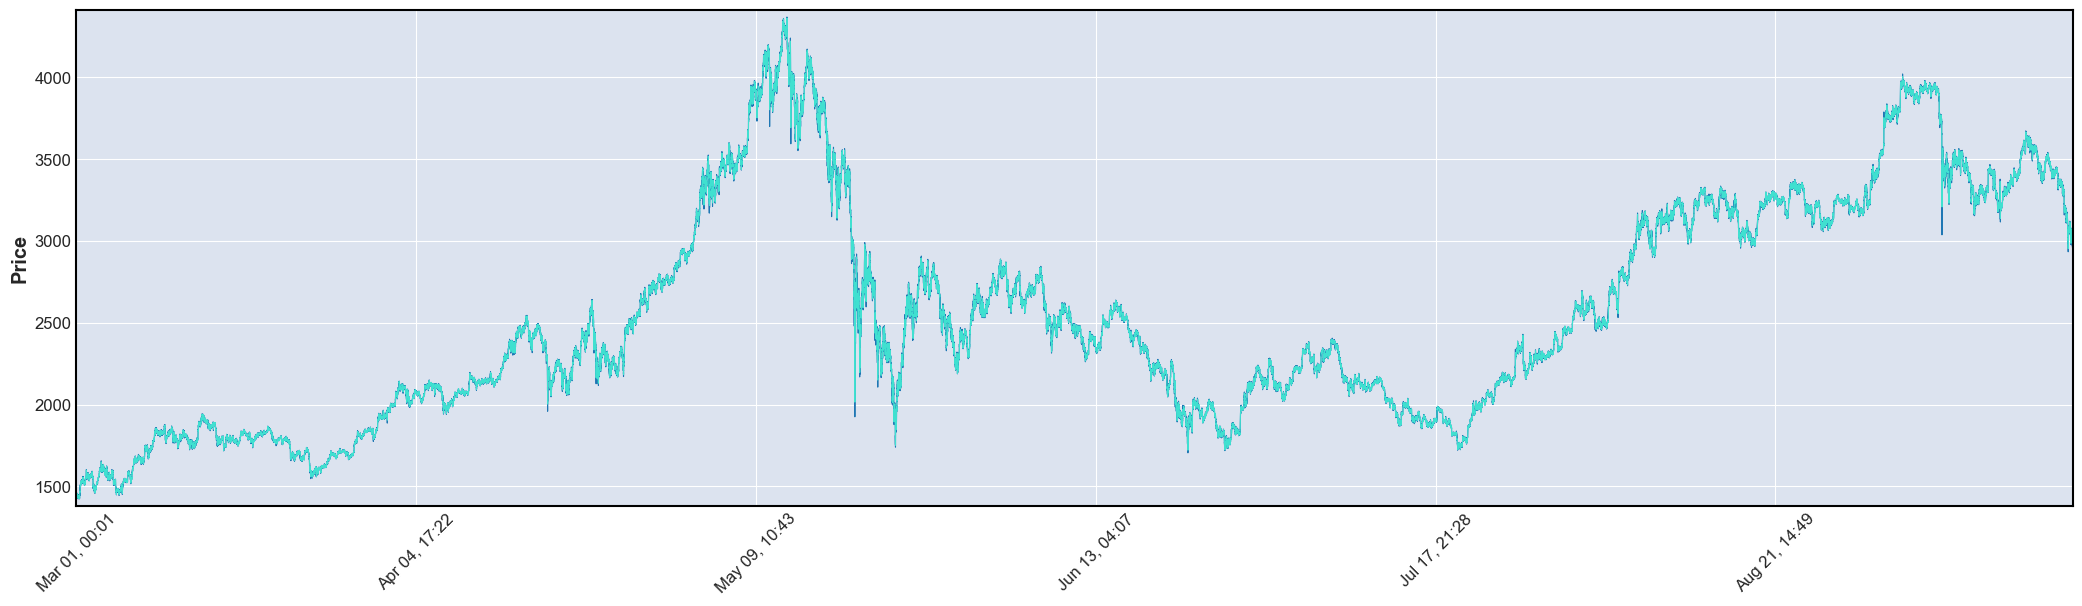

In [122]:
# WARNING: if you plot bigdata like 2 weeks, you must set params of type="line"
start_date, end_date = "2021-03-01", "2021-09-30"

mpf.plot(
    eth.loc[start_date:end_date,  ["Open", "High", "Low", "Close", "Volume"]],
    figratio=(16, 4),
    type="line",
    tight_layout=True,
    mav=7, # 5日移動平均
)

2021-03-01 00:00:00 ~ 2021-03-01 02:59:00


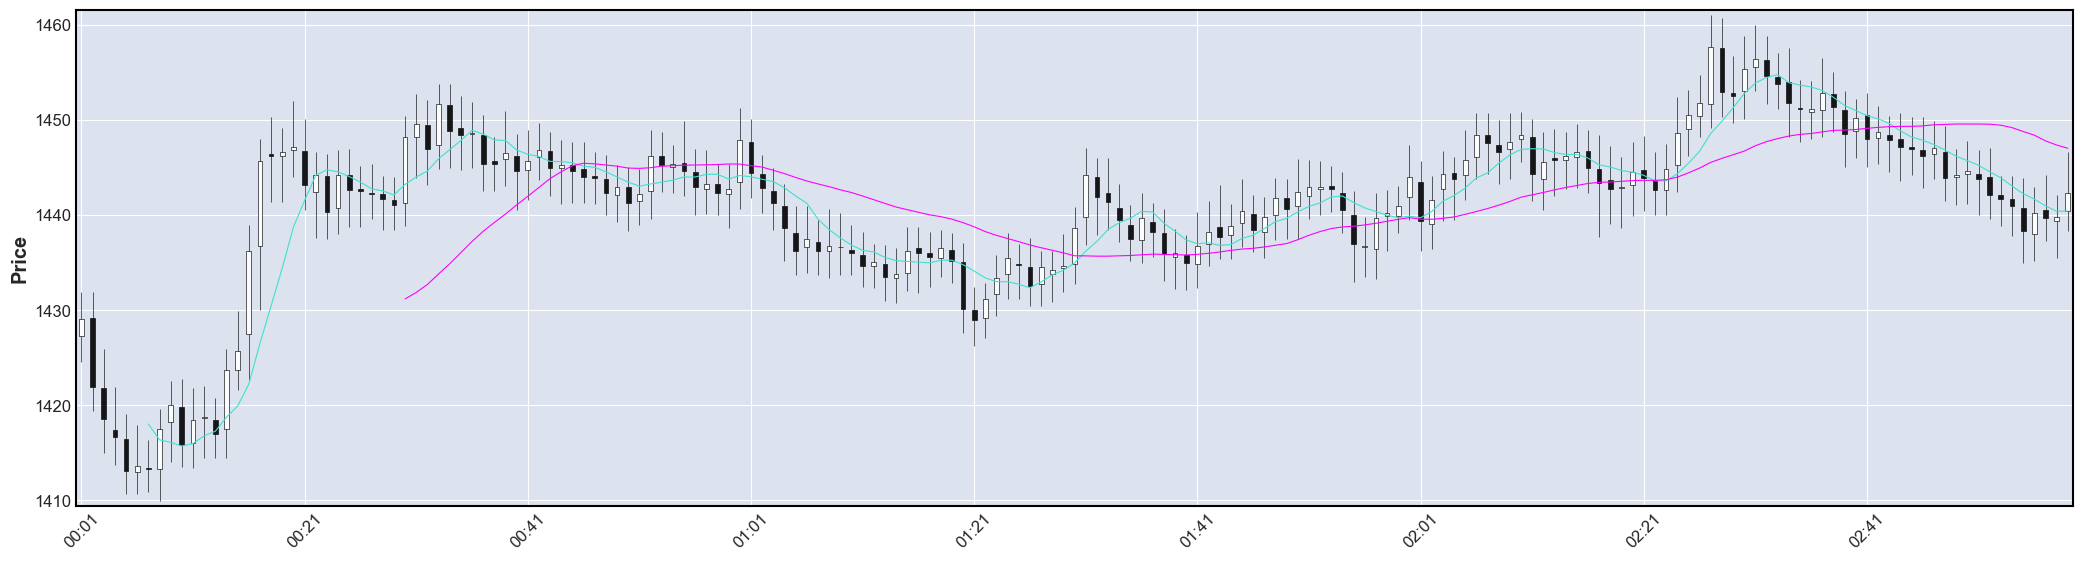

2021-03-01 03:00:00 ~ 2021-03-01 05:59:00


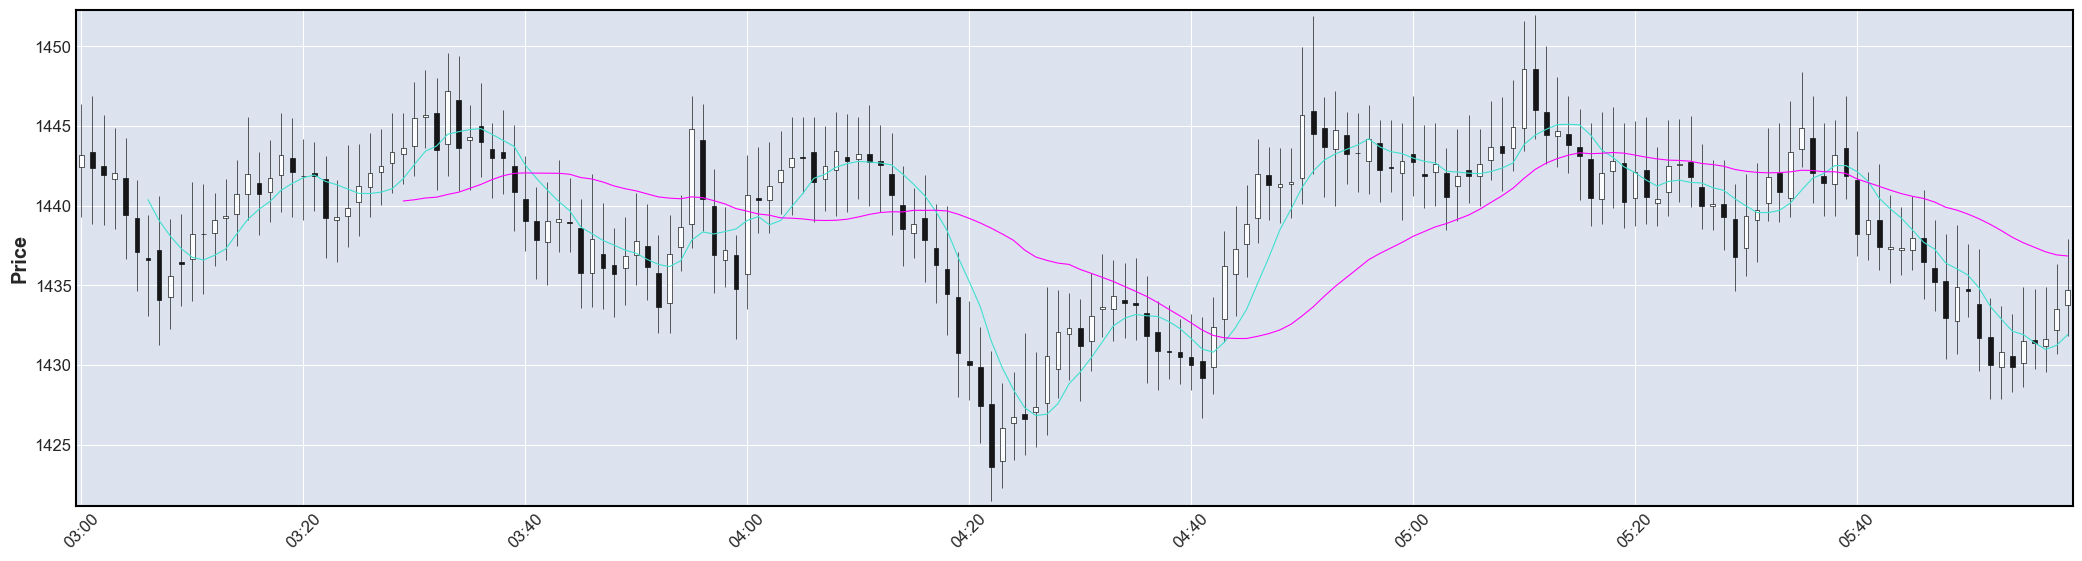

2021-03-01 06:00:00 ~ 2021-03-01 08:59:00


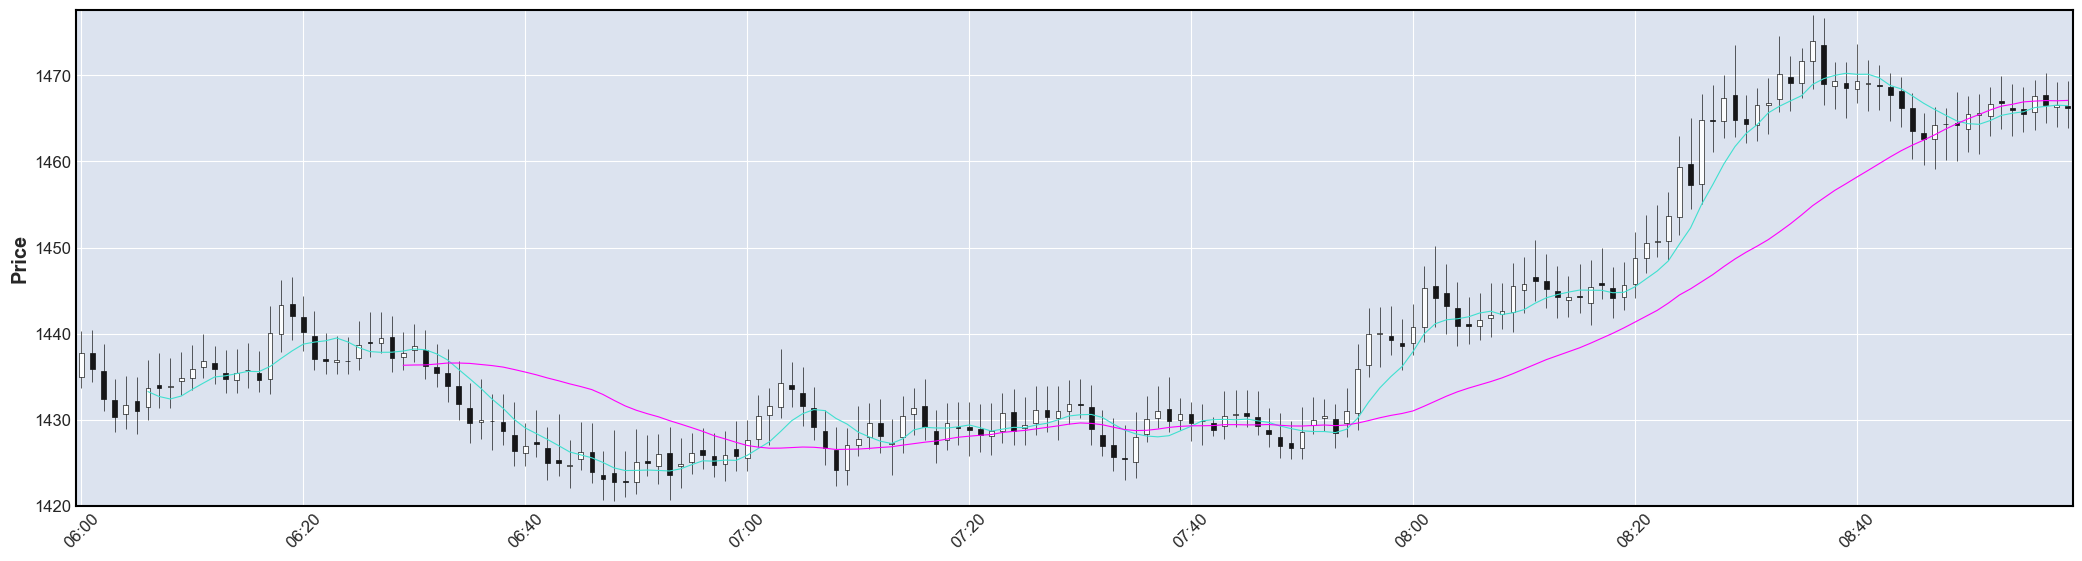

2021-03-01 09:00:00 ~ 2021-03-01 11:59:00


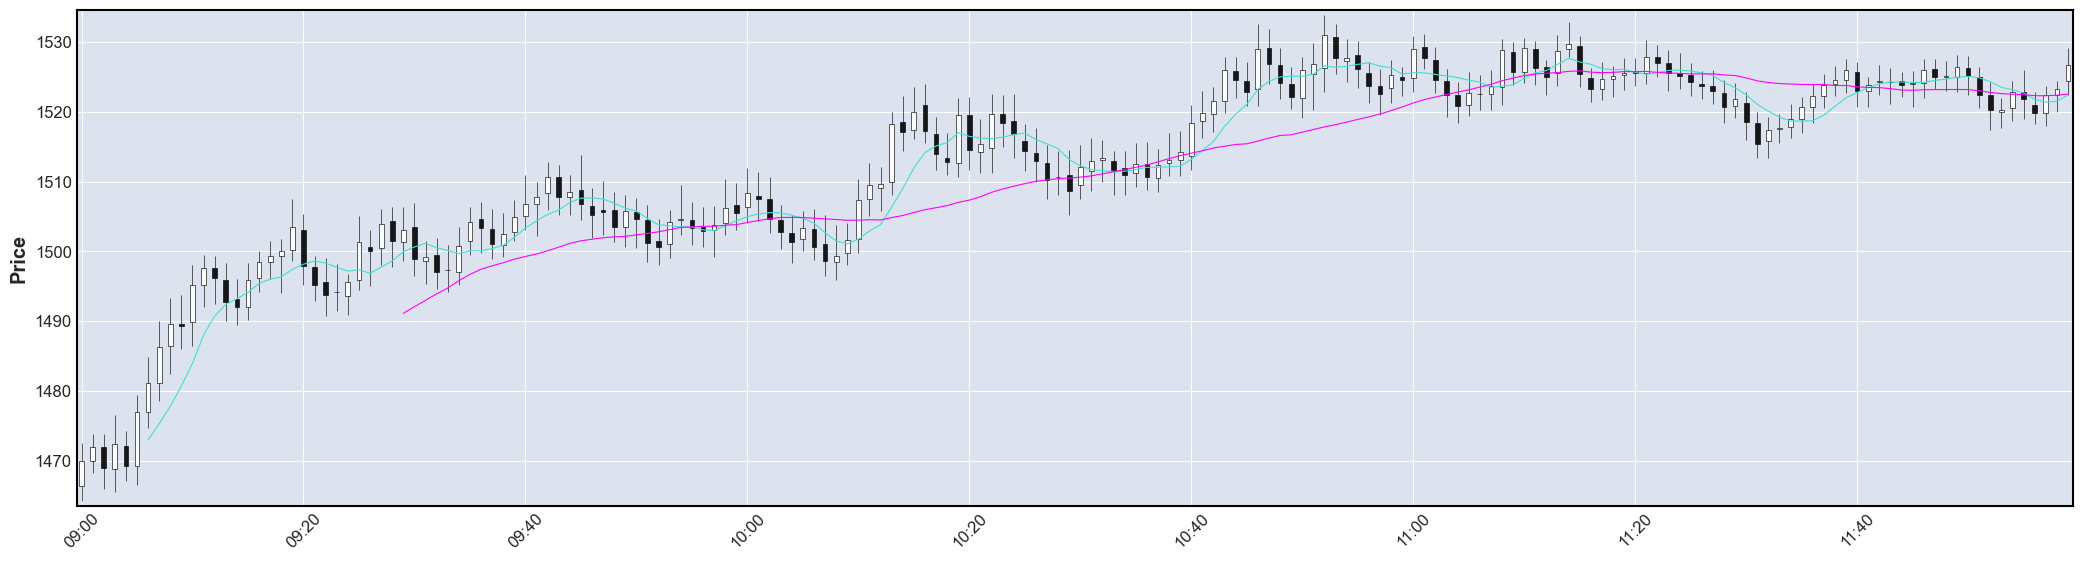

2021-03-01 12:00:00 ~ 2021-03-01 14:59:00


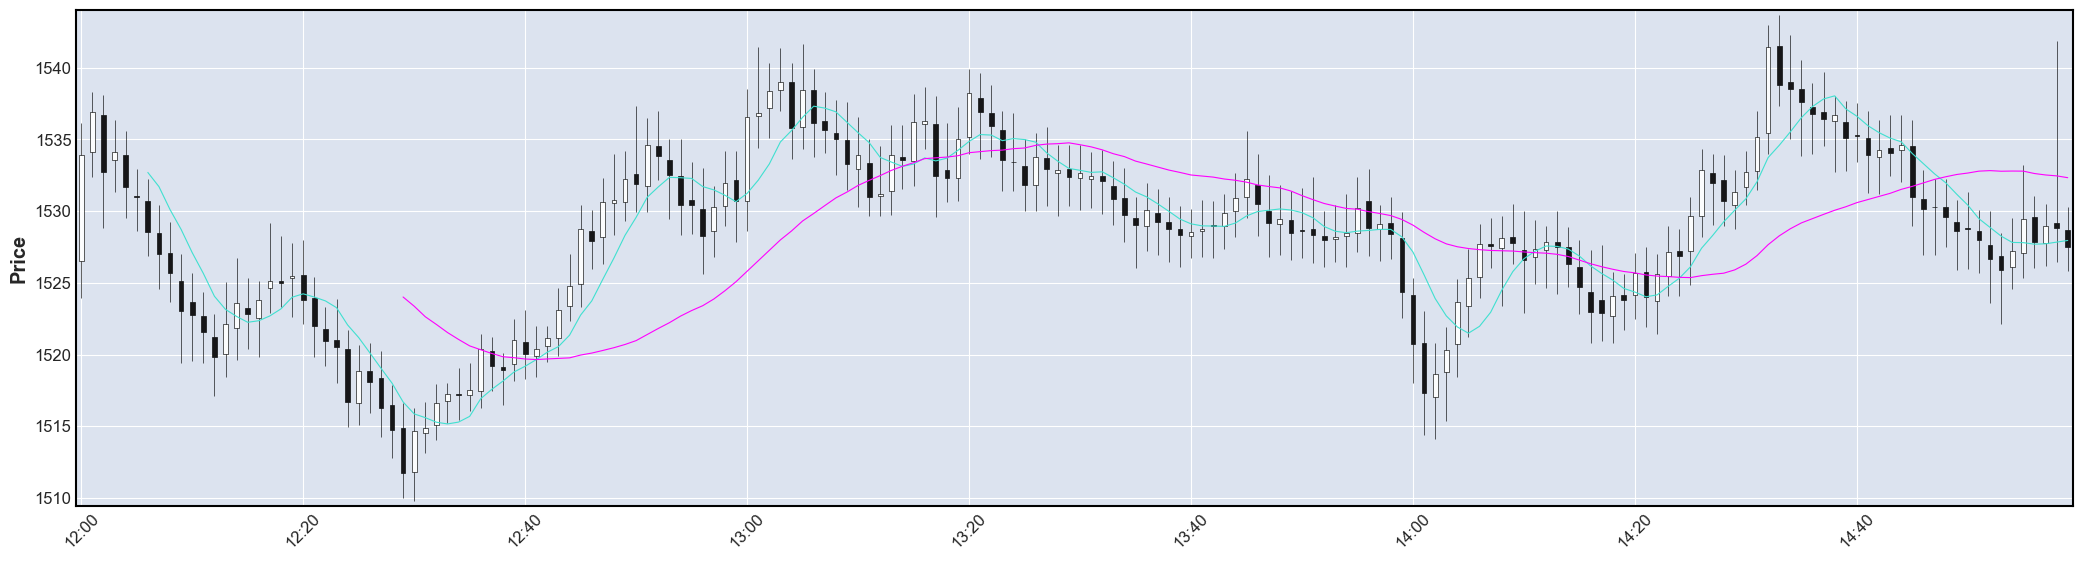

2021-03-01 15:00:00 ~ 2021-03-01 17:59:00


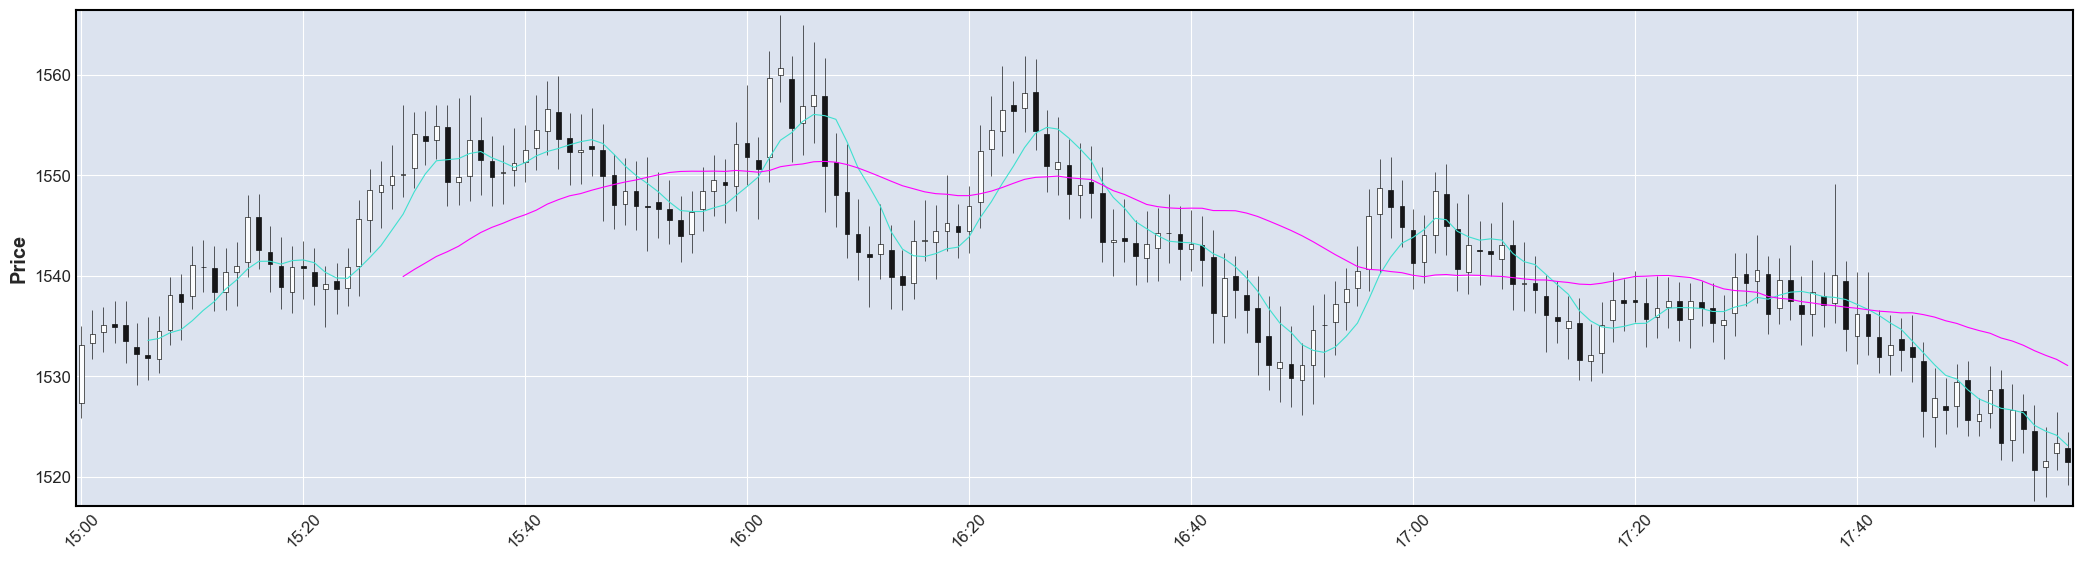

2021-03-01 18:00:00 ~ 2021-03-01 20:59:00


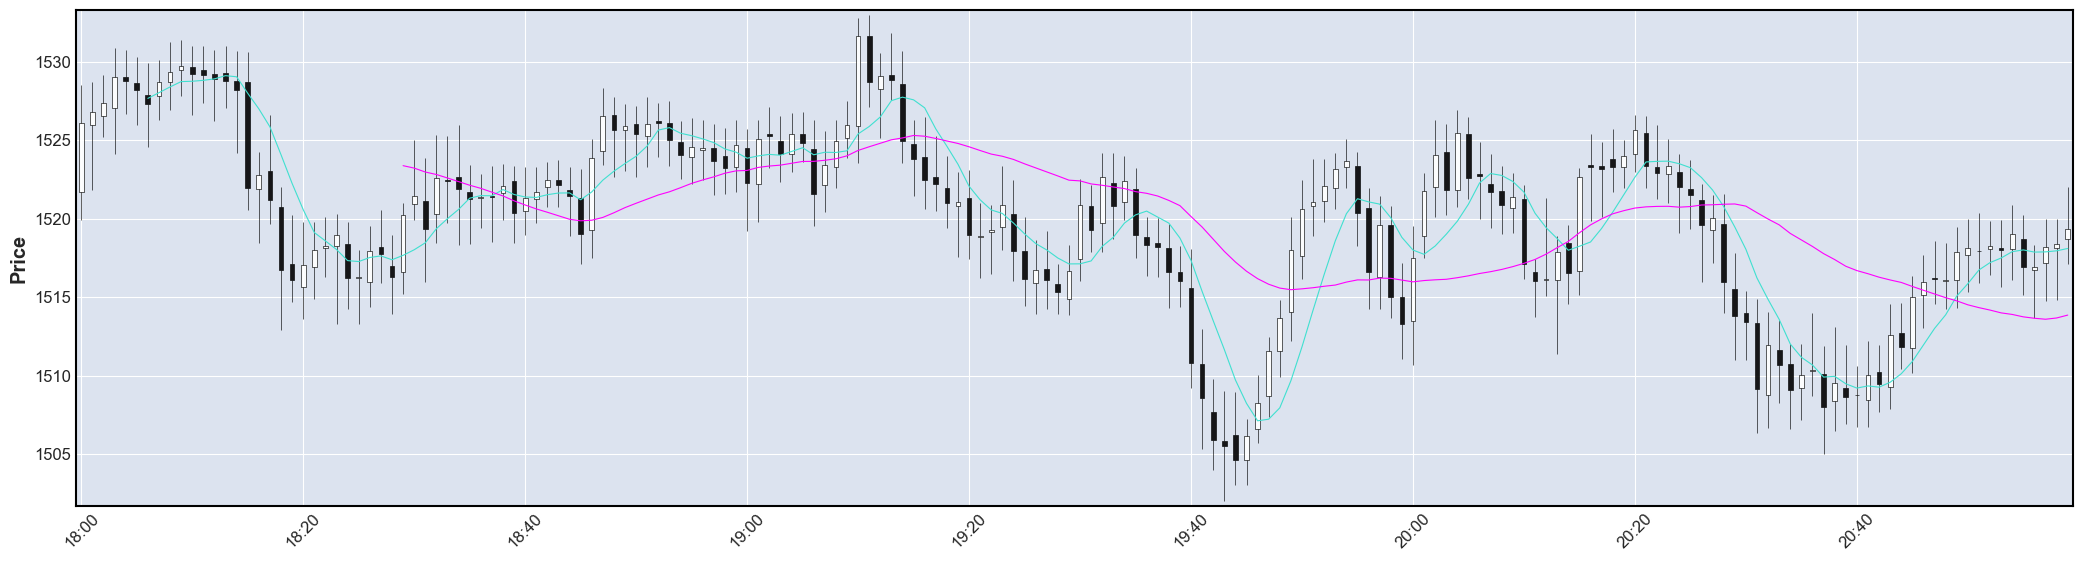

2021-03-01 21:00:00 ~ 2021-03-01 23:59:00


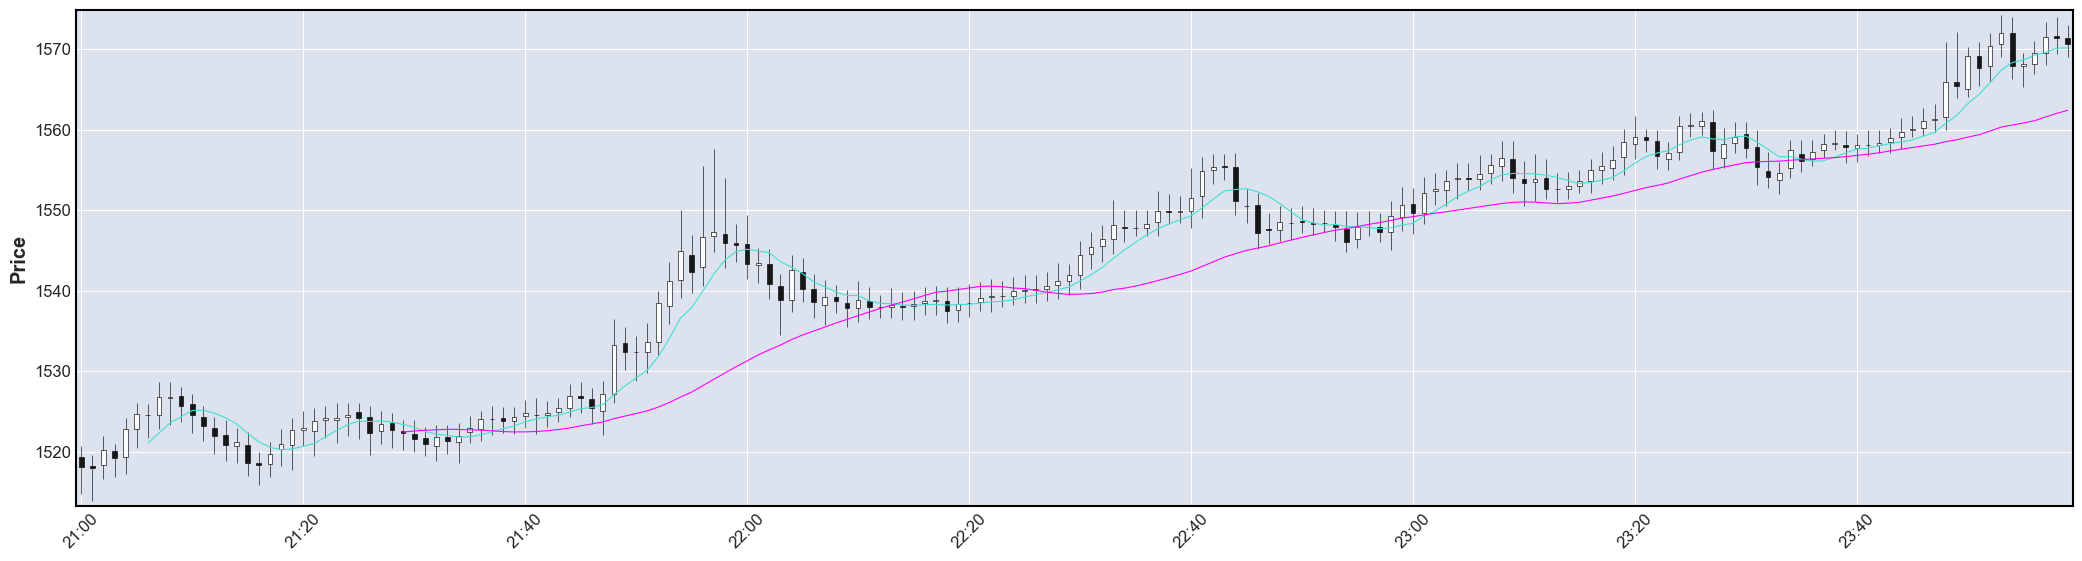

In [134]:
# WARNING: if you plot bigdata like 2 weeks, you must set params of type="line"

for h in range(0, 24, 3):
    start_date, end_date = f"2021-03-01 {h:02}:00:00", f"2021-03-01 {h+2:02}:59:00"
    print(start_date, "~", end_date)

    mpf.plot(
        eth.loc[start_date:end_date,  ["Open", "High", "Low", "Close", "Volume"]],
        figratio=(16, 4),
        type="candle",
        tight_layout=True,
        mav=(7, 30), # 7分移動平均
    )